# Analyse AirBnB Data from Seattle - Udacity Data Sience Nanodegree

**Goal:**
Analyse data according the CRISP-DM (Cross Industry Standard Process for Data Mining) method.

**Data source:**

Seattle AirBnb Data is available in kaggle: https://www.kaggle.com/airbnb/seattle
- calendar.csv
- listings.csv
- reviews.csv

# 1. Business understanding

Interesting Questions on dataset:
 
a) What neighborrhoods have the hightes prices? What neighbourhoods are most booked in Seattle? 

b) What kind of seasonal effects exist on pricing? Correlation to occupancy ratio in the whole city?

c)  What are the most occuring amenities? What effect do they have on number of bookings?

# 2. Data Understanding


In [18]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer



In [19]:
# read calendar.csv
df_cal = pd.read_csv('./data/calendar.csv')
print('Rows: ', df_cal.shape[0], 'Columns: ', df_cal.shape[1])
df_cal.head()

Rows:  1393570 Columns:  4


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
df_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [21]:
# read listings.csv
df_list = pd.read_csv('./data/listings.csv')
print('Rows: ', df_list.shape[0], 'Columns: ', df_list.shape[1])
df_list.head()


Rows:  3818 Columns:  92


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [22]:
# count number of listing_ids
len(df_list.id.unique())

3818

In [23]:
# column names + types
list_type = df_list.dtypes
pd.set_option('display.max_rows', 100)
print(list_type)


id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [24]:
# read reviews.csv
df_rev = pd.read_csv('./data/reviews.csv')
print('Rows: ', df_rev.shape[0], 'Columns: ', df_rev.shape[1])
df_rev.head()

Rows:  84849 Columns:  6


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [25]:
df_rev.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

**Result of data understanding:**



| Table | No of rows | No of columns | Content|
| :-: | :-:| :-: | :-: |
| *calendar* | 1393570 | 4 | availability and price for each object depending on date |
| *listing* | 3818 | 92 |  information for each object (host, neighborhood, amenities, type), 1 entry for each object |
| *reviews* | 84849 | 9 | comments of reviewers for each object |

## 3. Data Preparation

### dataframe calendar:
- convert datatypes
    - column available: conversion to boolean, comparision with boolean type is easier and faster
- convert datatype in column price
    - removal from $-sign (not necessary)
    - conversion from datatype object to datatype float; datatype float is necesary for numerical operations
- extract year, month, day
    column data: split type data in year, month, day. By doing this data can be clustered easiert in months etc.
- in column price NaN can be found, but NaN is only occuring if listing not available -> OK because only available listings can have an price -> so missing data here is OK

In [26]:
# clean data in dataframe calendar
pd.set_option('display.max_row', 1000)
df_cal
df_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [27]:
# convert data type of column available to boolean
df_cal['available'] = df_cal['available'] == 't'

# convert data type of column price to float
df_cal['price'] = df_cal['price'].str.replace('$', '')


df_cal['price'] = df_cal['price'].str.replace(',', '')
df_cal['price'] = df_cal['price'].astype(float)

# convert date to datatype datatime & extract year, day, month, week
df_cal['year'] = pd.DatetimeIndex(df_cal['date']).year
df_cal['day'] = pd.DatetimeIndex(df_cal['date']).day
df_cal['month'] = pd.DatetimeIndex(df_cal['date']).month
df_cal['week'] = pd.Int64Index(pd.DatetimeIndex(df_cal['date']).isocalendar().week)
df_cal['date'] = pd.to_datetime(df_cal['date'])
print(df_cal)

         listing_id       date  available  price  year  day  month  week
0            241032 2016-01-04       True   85.0  2016    4      1     1
1            241032 2016-01-05       True   85.0  2016    5      1     1
2            241032 2016-01-06      False    NaN  2016    6      1     1
3            241032 2016-01-07      False    NaN  2016    7      1     1
4            241032 2016-01-08      False    NaN  2016    8      1     1
...             ...        ...        ...    ...   ...  ...    ...   ...
1393565    10208623 2016-12-29      False    NaN  2016   29     12    52
1393566    10208623 2016-12-30      False    NaN  2016   30     12    52
1393567    10208623 2016-12-31      False    NaN  2016   31     12    52
1393568    10208623 2017-01-01      False    NaN  2017    1      1    52
1393569    10208623 2017-01-02      False    NaN  2017    2      1     1

[1393570 rows x 8 columns]


In [28]:
# check if price is only NaN in case available is false
print(df_cal['available'].value_counts())
print(np.sum(df_cal.price.isna()))



True     934542
False    459028
Name: available, dtype: int64
459028


In [29]:
# final types
df_cal.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
year                   int64
day                    int64
month                  int64
week                   int64
dtype: object

### dataframe listing:

column neighbourhood:
- there are no missing values with null or NaN -> no changes necessary
- change datatype to type category. column with type category can be clustered 

In [30]:
# column neighbourhood (relevant for 1a)

print("rows with null: ", np.sum(df_list['neighbourhood_group_cleansed'].isnull()), " --- rows with NaN:", np.sum(df_list['neighbourhood_group_cleansed'].isna()))
df_list['neighbourhood_group_cleansed'].value_counts()

#change to categorical variable
df_list['neighbourhood_group_cleansed'] = df_list['neighbourhood_group_cleansed'].astype('category')
print(df_list['neighbourhood_group_cleansed'])

rows with null:  0  --- rows with NaN: 0
0                Queen Anne
1                Queen Anne
2                Queen Anne
3                Queen Anne
4                Queen Anne
               ...         
3813    Other neighborhoods
3814           Capitol Hill
3815         Rainier Valley
3816           Capitol Hill
3817             Queen Anne
Name: neighbourhood_group_cleansed, Length: 3818, dtype: category
Categories (17, object): ['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', ..., 'Rainier Valley', 'Seward Park', 'University District', 'West Seattle']


column price:
- replace unnecessary characters like $ or empty spaces
- convert to float
Steps are necessary to to numercial operations (float or integer necessary)

In [31]:
# column price
# replace $ and convert to float
df_list['price'] = df_list['price'].str.replace('$', '')
df_list['price'] = df_list['price'].str.replace(',', '')
df_list['price'] = df_list['price'].astype(float)


**Column amenities**

For easier data analysis for each amenity a separate column with boolean value should be created; string can be analyzed without preprocessing.
For data analysis this is necessary since each amenity has it's own column -> counting or numerical operations are easier
each column has boolean type (true / false) depending if amenity is available for listing
Before separation all strings like "" etc. have to be removed
For separation in columnn function mulitlabelbinarizer from sklearn is used

In [32]:
# column amenities (relevant for question 1c)
df_ame = df_list['amenities'].copy()
print(df_ame)


0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object


In [33]:
df_ame = df_ame.str.replace('"', '')
df_ame = df_ame.str.replace('{', '')
df_ame = df_ame.str.replace('}', '')
df_ame.fillna('none')
# print(df_ame)

# use mulitlabelbinarizer from sklearn: 
# https://stackoverflow.com/questions/58871608/how-to-binary-encode-multi-valued-categorical-variable-in-pandas
mlb = MultiLabelBinarizer()
df_label_ame = pd.DataFrame(mlb.fit_transform(df_ame.str.split(",")), columns = mlb.classes_, index=df_ame.index)
print(df_label_ame.columns)
# drop column with empty label
df_label_ame.drop('', axis=1, inplace=True)
df_label_ame = df_label_ame.astype('bool')
print(df_label_ame)
#df_label_ame.dtypes

Index(['', '24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool',
       'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed',
       'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer',
       'Wheelchair Accessible', 'Wireless Internet'],
      dtype='object')
      24-Hour Check-in  Air Conditioning  Breakfast  Buzzer/Wireless Intercom  \
0                False              True      False                     False   
1                False             False      False 

In [34]:
aa = df_list['availability_365']
print(aa)
aa.max()

0       346
1       291
2       220
3       143
4       365
       ... 
3813     32
3814    273
3815     88
3816    179
3817      7
Name: availability_365, Length: 3818, dtype: int64


365

## 4. Data Modeling
not necessary to answer business questions

## 5. Data Evaluation and Visualization

### a)  What neighborrhoods have the hightes prices? What neighbourhoods are most booked in Seattle?



**DATA EVALUATION**

For availability I use the avaiability_365 (average of complete year).
Price and availability_365 can be found in listing; data is grouped by neighbourhood_group_cleansed since number of categories (neighourhoods) is comparable

In [35]:
resAA = df_list.groupby(['neighbourhood_group_cleansed'])[['price', 'availability_365']].mean().sort_values(by='price', ascending=False)
resAA['availability_365'] = resAA['availability_365'].div(365)*100
resAA


,price,availability_365
neighbourhood_group_cleansed,,
Magnolia,177.672131,77.466876
Queen Anne,157.223729,62.042257
Downtown,154.405660,64.990954
West Seattle,141.359606,70.112693
Cascade,140.101124,57.617362
Capitol Hill,130.592593,64.104757
Central Area,128.338753,67.235401
Ballard,124.682609,69.225730
Other neighborhoods,119.968514,67.168490


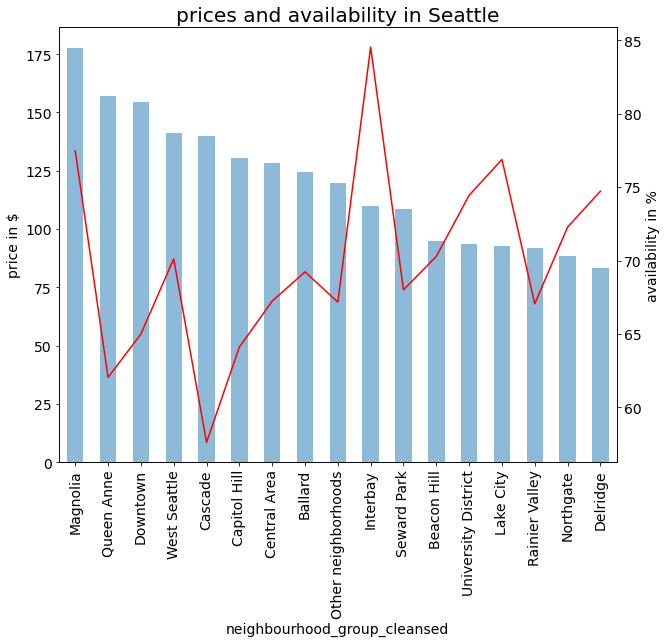

In [36]:
plt.rcParams.update({'font.size': 14})
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
resAA[['price']].plot(kind='bar', alpha = 0.5, ax = ax1, legend=None)
resAA[['availability_365']].plot(kind='line', ax=ax2, color = 'r', legend=None)
ax1.set_ylabel('price in $')
ax2.set_ylabel('availability in %')
plt.title("prices and availability in Seattle", fontsize='x-large')
plt.show()

**FINDINGS:**

- Prices depend extreme on the neighborhood (range from 177 dollar to 83 dollar)
- Magnolia is the most expensiest neighborhood, following by Queen Ann, Downtown and West Seattle
- prices in the 6 most cheapest neighborhoods are similar (between 83 and 94 dollar)
- availability has no strong correlation to the price
- rooms in more expensive areas have a less availability than cheaper areas (most of the top 10 most expensiest neighborhoods have an average availability of < 70%, whereas neighbourhoods with cheaper prices have an availability of > 70%
- an exception is Magnolia (most expensiest neighourhood) with an availability of > 75%
- availability does not vary extremely between neighourhoods -> for further price analysis no differentiation on neighbourhood necessary



### b) What kind of seasonal effects exist on pricing? Correlation to occupancy ratio in the whole city?

**DATA EVALUATION**

- Only data from file calender is necessary
- Instead of occupancy ratio availability is used (same meaning)
- All data is already prepared, plots are possible


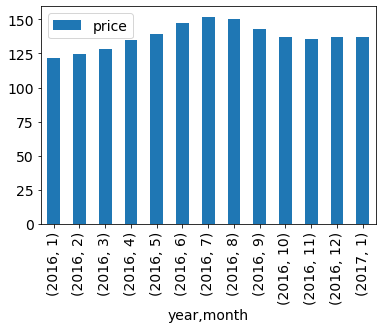

In [37]:
# plot price per month
df_cal.groupby(['year','month'])[['price']].mean().plot(kind="bar");

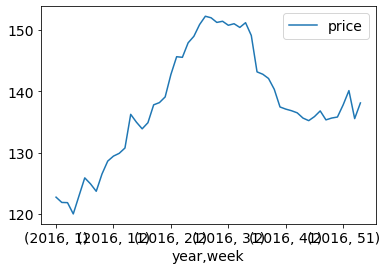

In [38]:
# plot price per month
df_cal.groupby(['year','week'])[['price']].mean().plot();

Plot per month is not really usefull since resolution is too low -> price per week is used for further analysis

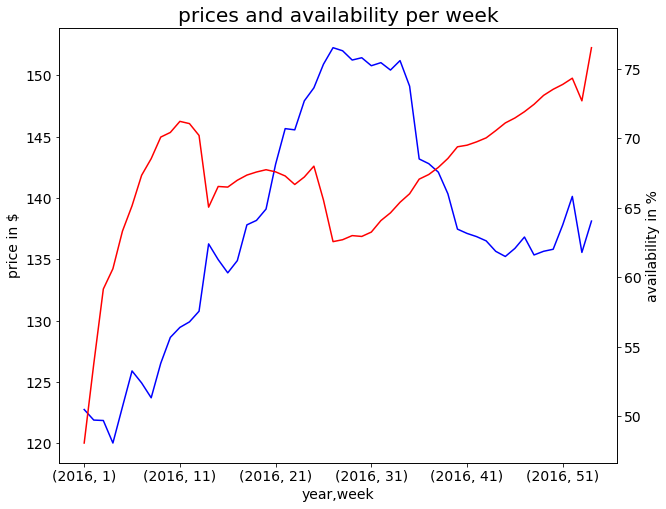

In [39]:
# plot price per week (for debugging)
#price = df_cal.groupby(['year','week'])[['price']].mean()
#print(price)

# calculate availability (for debugging)
#ratio = df_cal.groupby(['year','week'])['available'].mean()*100
#print(ratio)

#plot price and availability in 1 diagram
plt.rcParams.update({'font.size': 14})
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
df_cal.groupby(['year','week'])[['price']].mean().plot(kind='line', ax = ax1, color = 'b', legend=None)
df_cal.groupby(['year','week'])['available'].mean().multiply(100).plot(kind='line', ax=ax2, color = 'r', legend=None)
ax1.set_ylabel('price in $')
ax2.set_ylabel('availability in %')
plt.title("prices and availability per week", fontsize='x-large')
plt.show()


**FINDINGS:**

- According the prices the highest prices are requested in summer during week 26 and 34 (average price > 150 US dollar)
- Prices increase from beginning of year from 120 US dollar until peak in summer
- Price level after highseason is higher than before highseason 
- Single Peaks are visible (exampel week 52, christmas time)
- There is a correlation visible between prices and availability
- Availability is lower during summer season compared to spring or autumn (~60% in summer, spring & autumn > 65%)
- Beginning of the year availability increases with increasing prices 
- Availability after summer season is higher than before summer season in spring (higher prices after summer season)
- Availability increases until end of year after minimum in summer (from 60% until 75%)
- There are not attemts to attract more tourists in autumn / end of year by lowering the price (availability continiously increases)

### c)  What are the most occuring amenities? What effect do they have on number of bookings?

**DATA EVALUATION**

- data frame df_label_ame is already prepared for analyzing the amenities
- effect on number of bookings is only analyzed for top amenities
- To analyze number of bookings the value availability_30 is used (dataframe listing)

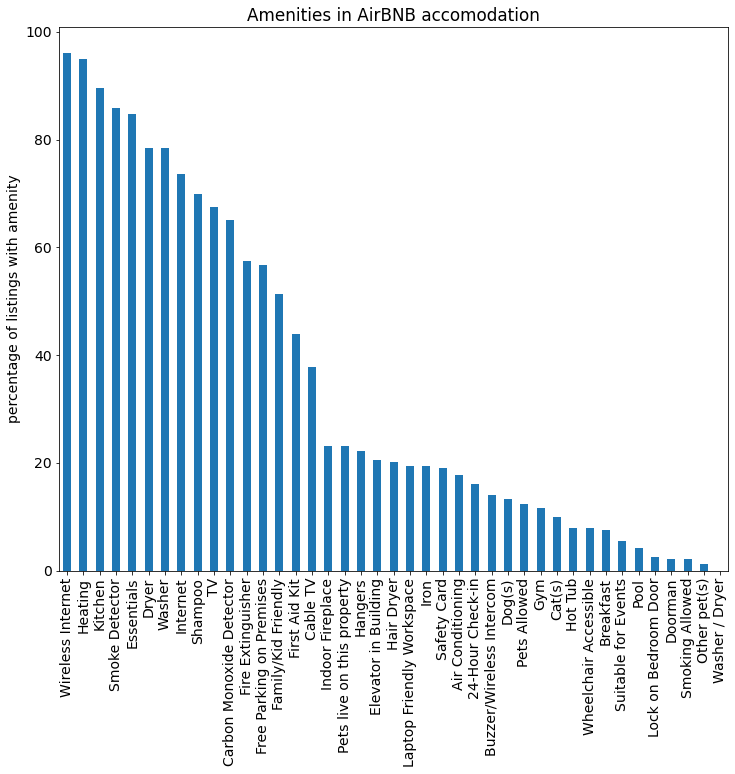

In [40]:
plt.rcParams.update({'font.size': 14})
#print(df_label_ame.mean().mul(100).sort_values(ascending=False))
ax = df_label_ame.mean().mul(100).sort_values(ascending=False).plot(kind='bar', figsize = (12,10))
plt.title('Amenities in AirBNB accomodation')
ax.set_ylabel('percentage of listings with amenity')
plt.show()

In [41]:
# add column availability_365 to dataframe

df_list['available'] = df_list['availability_30'].div(30)
df_new = pd.concat([df_label_ame, df_list['available']], axis = 1)

# for debugging
#df_new = df_new.head(10)
# print(df_new)

df_res = []
df_res = pd.DataFrame(columns = ['amenity', 'perc', 'occup. w', 'occup. w/o', 'delta'])
for col in df_new.columns:
    if col == 'available':
        continue
    # calc average availability for each amenities
    aa = df_new[col].mean()*100
    # only use top amenities (> 25%)
    if aa > 25:
        bb = (1 - (df_new['available'][df_new[col]]).mean())*100
        cc = (1 - (df_new['available'][~df_new[col]]).mean())*100
        df_res = df_res.append({'amenity': col, 'perc': aa, 'occup. w': bb, 'occup. w/o':cc, 'delta': bb-cc}, ignore_index=True)

df_res = df_res.sort_values('perc', ascending=False)
df_res
   
    

,amenity,perc,occup. w,occup. w/o,delta
15,Wireless Internet,96.045050,44.135079,41.876380,2.258699
8,Heating,94.997381,44.009742,44.729494,-0.719752
10,Kitchen,89.654269,45.115396,34.776371,10.339025
12,Smoke Detector,85.935045,44.599208,40.664184,3.935024
3,Essentials,84.782609,44.380599,42.180149,2.200450
2,Dryer,78.496595,45.041708,40.410069,4.631639
14,Washer,78.365636,44.954323,40.754641,4.199682
9,Internet,73.624935,44.546425,42.648130,1.898295
11,Shampoo,69.931902,43.353308,45.656214,-2.302905
13,TV,67.417496,45.242165,41.570204,3.671962


In [42]:
df_res_filter = df_res[df_res.delta.abs() > 3]
df_res_filter = df_res_filter.sort_values('delta', ascending=False)
df_res_filter

,amenity,perc,occup. w,occup. w/o,delta
10,Kitchen,89.654269,45.115396,34.776371,10.339025
2,Dryer,78.496595,45.041708,40.410069,4.631639
14,Washer,78.365636,44.954323,40.754641,4.199682
12,Smoke Detector,85.935045,44.599208,40.664184,3.935024
13,TV,67.417496,45.242165,41.570204,3.671962


**FINDINGS:**

- The most occuring amenities are: Wireless Internet, Heating, Ktichen, Smoke detectors, Essentials, Dryer, Washer. More than 78% of all listings have these amenities.
- Only wireless internet, heating, kitchen, smoke detector, essentials, dryer, washer, internet, shampoo, TV, carbon monoxide detector, fire extinguisher, free parking, family/kid friendly, first aid kit and cable tv appear in more than 25% of all listings
- listings with kitchen have a significant higher booking / occupancy in case a kitchen is available (10% higher); This is remarkable since a kitchen is available in 89.7% of all listings
- listings with Smoke detector (+3.9%), Dryer (+4.6%), Washer (+4.2%) and TV (+3.7%) have also a higher booking rate than listings without. Smoke detector maybe a coincidence
- In general listings with more amenities have a higher booking rate than listings with less amenities